In [12]:
!pip install opencv-python matplotlib scikit-learn tensorflow


[notice] A new release of pip is available: 23.3.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


🔍 Verificando pastas:
  ➕ Positive folder: c:\Users\rafae\Downloads\trabalho-pdi-final\src\dataset\Positive
  ➖ Negative folder: c:\Users\rafae\Downloads\trabalho-pdi-final\src\dataset\Negative


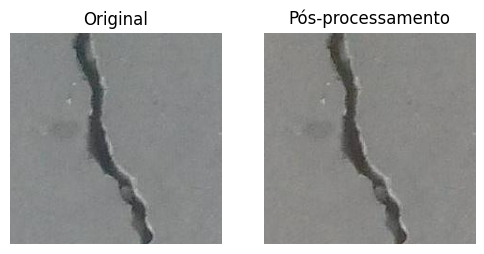

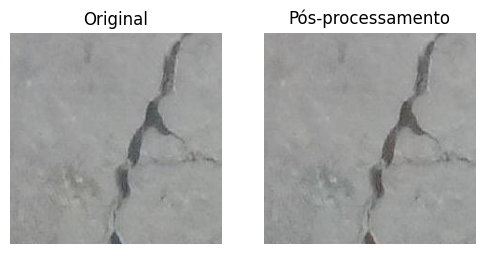

✅ Dataset carregado. Shape: (10000, 227, 227, 3), Distribuição de classes: [5000 5000]


c:\Users\rafae\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_56 (Conv2D)              │ (None, 223, 223, 6)    │           456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_44            │ (None, 111, 111, 6)    │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_57 (Conv2D)              │ (None, 107, 107, 16)   │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_45            │ (None, 53, 53, 16)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_26 (Flatten)            │ (None, 44944)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_74 (Dense)                │ (None, 120)            │     5,393,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_75 (Dense)                │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_76 (Dense)                │ (None, 1)              │            85 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,406,521 (20.62 MB)

 Trainable params: 5,406,521 (20.62 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 66s 79ms/step - accuracy: 0.4994 - loss: 0.8004 - val_accuracy: 0.5188 - val_loss: 0.6956
Epoch 2/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 61s 76ms/step - accuracy: 0.5070 - loss: 0.6961 - val_accuracy: 0.4812 - val_loss: 0.6934
Epoch 3/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 57s 71ms/step - accuracy: 0.5006 - loss: 0.6967 - val_accuracy: 0.4812 - val_loss: 0.6980
Epoch 4/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 56s 70ms/step - accuracy: 0.4856 - loss: 0.6969 - val_accuracy: 0.4812 - val_loss: 0.6952
Epoch 5/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 61s 76ms/step - accuracy: 0.5096 - loss: 0.6960 - val_accuracy: 0.4812 - val_loss: 0.7033
Epoch 6/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 61s 76ms/step - accuracy: 0.4856 - loss: 0.6986 - val_accuracy: 0.4812 - val_loss: 0.6944
Epoch 7/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 61s 76ms/step - accuracy: 0.5165 - loss: 0.6967 - val_accuracy: 0.4812 - val_loss: 0.6980
Epoch 8/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 62s 77ms/step - accuracy: 0.4834 - loss: 0.6976 - 

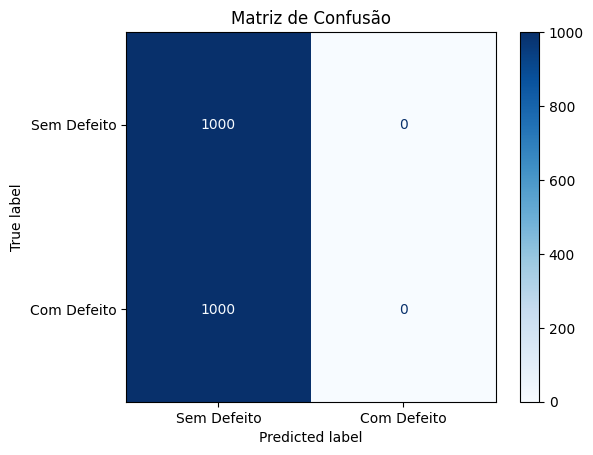

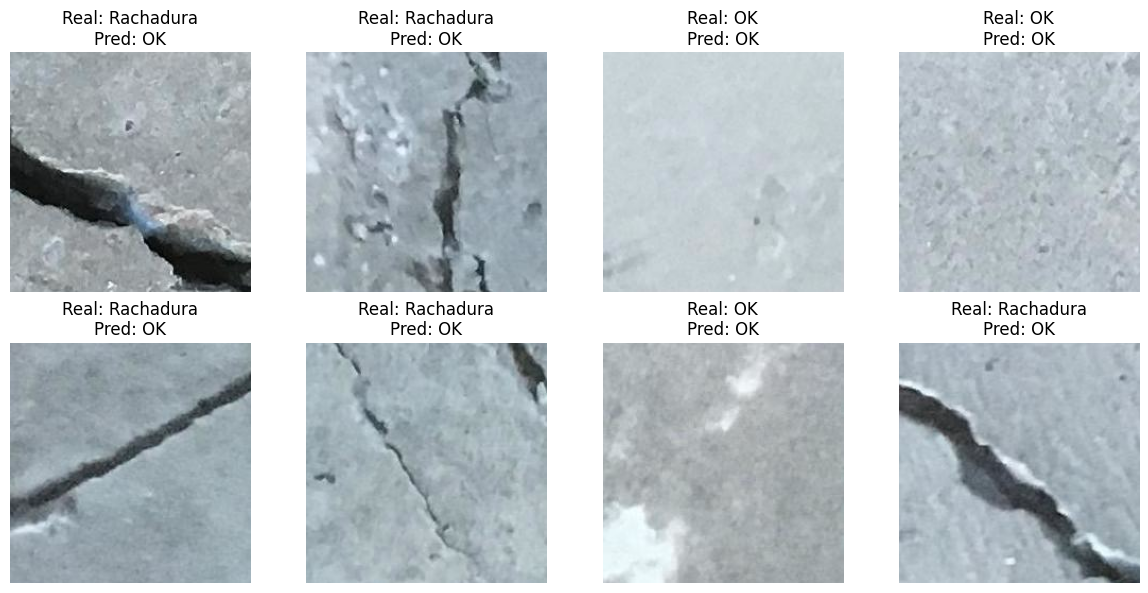

In [51]:
# -------------------------------
# IMPORTAÇÕES
# -------------------------------
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay, classification_report
)
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, AveragePooling2D


# -------------------------------
# FUNÇÃO DE PRÉ-PROCESSAMENTO
# -------------------------------
def preprocess_image(img):
    # Normaliza para [0,1], mantém 3 canais, sem alteração de tamanho
    img = img.astype(np.float32) / 255.0
    return img


def load_and_preprocess(pos_folder, neg_folder, n_each=50):
    imgs, lbls = [], []

    print(f"🔍 Verificando pastas:")
    print(f"  ➕ Positive folder: {os.path.abspath(pos_folder)}")
    print(f"  ➖ Negative folder: {os.path.abspath(neg_folder)}")

    pos_files = sorted([f for f in os.listdir(pos_folder) if f.lower().endswith(('.jpg','.png','.jpeg'))])[:n_each]
    neg_files = sorted([f for f in os.listdir(neg_folder) if f.lower().endswith(('.jpg','.png','.jpeg'))])[:n_each]

    def _process_list(folder, files, label):
        for fname in files:
            path = os.path.join(folder, fname)
            img = cv2.imread(path)
            if img is None:
                print(f"⚠️ Imagem não carregada: {path}")
                continue

            # Converter BGR para RGB para visualização correta
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            # Mostrar antes e depois para até 2 imagens
            if len(imgs) < 2:
                plt.figure(figsize=(6,3))
                plt.subplot(1,2,1)
                plt.imshow(img_rgb)
                plt.title("Original")
                plt.axis('off')

            img_processed = preprocess_image(img)

            if len(imgs) < 2:
                plt.subplot(1,2,2)
                plt.imshow(img_processed)
                plt.title("Pós-processamento")
                plt.axis('off')
                plt.show()

            imgs.append(img_processed)
            lbls.append(label)

    _process_list(pos_folder, pos_files, 1)
    _process_list(neg_folder, neg_files, 0)

    return np.array(imgs), np.array(lbls)


# -------------------------------
# CARREGAMENTO DO DATASET
# -------------------------------
pos_dir = 'dataset/Positive'
neg_dir = 'dataset/Negative'

if not os.path.isdir(pos_dir):
    raise FileNotFoundError(f"❌ Diretório não encontrado: {os.path.abspath(pos_dir)}")

if not os.path.isdir(neg_dir):
    raise FileNotFoundError(f"❌ Diretório não encontrado: {os.path.abspath(neg_dir)}")

X, y = load_and_preprocess(pos_dir, neg_dir, n_each=5000)
print(f"✅ Dataset carregado. Shape: {X.shape}, Distribuição de classes: {np.bincount(y)}")


# -------------------------------
# SPLIT DO DATASET — 20% TESTE
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


# -------------------------------
# DEFINIÇÃO DO MODELO CNN
# -------------------------------
input_shape = X_train.shape[1:]  # (altura, largura, 3)

model = Sequential()
model.add(Conv2D(6, kernel_size=(5,5), padding='valid', activation='tanh', input_shape=input_shape))
model.add(AveragePooling2D(pool_size=(2,2), strides=2, padding='valid'))
model.add(Conv2D(16, kernel_size=(5,5), padding='valid', activation='tanh'))
model.add(AveragePooling2D(pool_size=(2,2), strides=2, padding='valid'))
model.add(Flatten())
model.add(Dense(120, activation='tanh'))
model.add(Dense(84, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

# Compile o modelo antes de treinar
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


# -------------------------------
# TREINAMENTO DO MODELO
# -------------------------------
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=8,
    validation_split=0.2,
    verbose=1
)


# -------------------------------
# AVALIAÇÃO DO MODELO
# -------------------------------
y_pred_prob = model.predict(X_test).ravel()
y_pred = (y_pred_prob > 0.5).astype(int)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, zero_division=0)
rec = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

print(f"\n📊 Métricas de Desempenho:")
print(f"  - Acurácia:  {acc:.4f}")
print(f"  - Precisão:  {prec:.4f}")
print(f"  - Recall:    {rec:.4f}")
print(f"  - F1-Score:  {f1:.4f}")

print("\n📄 Classification Report:")
print(classification_report(y_test, y_pred, target_names=["Sem Defeito", "Com Defeito"], zero_division=0))


# Matriz de Confusão
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Sem Defeito", "Com Defeito"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusão")
plt.show()


# -------------------------------
# VISUALIZAÇÃO DAS PREDIÇÕES
# -------------------------------
plt.figure(figsize=(12,6))
for i in range(min(8, len(X_test))):
    idx = np.random.randint(0, len(X_test))
    img = X_test[idx]
    true_label = y_test[idx]
    pred_label = y_pred[idx]

    plt.subplot(2, 4, i+1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Real: {'Rachadura' if true_label==1 else 'OK'}\nPred: {'Rachadura' if pred_label==1 else 'OK'}")

plt.tight_layout()
plt.show()


In [ ]:
import os
print(os.getcwd())

c:\Users\rafae\Downloads\trabalho-pdi-final\src
